In [2]:
#Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_enrollment=pd.read_csv("university_enrollment_2306.csv")
df_enrollment.head(20)

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
5,6,online,2014,246,50.1,76.0,Beginner,Math
6,7,online,2021,241,87.83,84.0,Beginner,Science
7,8,online,2018,261,76.48,88.0,None,Technology
8,9,online,2019,261,83.97,87.0,None,Technology
9,10,classroom,2016,180,83.53,79.0,Beginner,Engineering


In [6]:
df_enrollment.duplicated().sum()

0

In [25]:
df_enrollment.isna().sum()

course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
department          0
dtype: int64

In [16]:
#filling the missing values with the mean
df_enrollment.fillna(np.mean(df_enrollment["post_score"]),inplace=True)

In [18]:
#drop pre_requirement
#df_enrollment=df_enrollment.drop(["pre_requirement"],axis=1)
df_enrollment

,course_id,course_type,year,enrollment_count,pre_score,post_score,department
0,1,classroom,2018,165,28.14,73.0,Science
1,2,classroom,2020,175,79.68,86.0,Science
2,3,online,2016,257,57.24,80.0,Mathematics
3,4,online,2013,251,97.67,75.0,Technology
4,5,classroom,2019,165,39.75,76.0,Science
...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Science
1846,1847,online,2016,261,94.27,85.0,Technology
1847,1848,online,2011,257,76,81.0,Mathematics
1848,1849,online,2013,256,20.67,66.0,Math


In [20]:
#checking the value count
df_enrollment["course_type"].value_counts()

online       1375
classroom     475
Name: course_type, dtype: int64

In [21]:
#checking the value of counts in the year
df_enrollment["year"].value_counts()

2013    169
2012    164
2016    162
2015    160
2021    159
2018    156
2014    152
2022    150
2011    148
2019    147
2017    143
2020    140
Name: year, dtype: int64

In [22]:
#check sum for missing course type
df_enrollment["course_type"].sum

<bound method Series.sum of 0       classroom
1       classroom
2          online
3          online
4       classroom
          ...    
1845    classroom
1846       online
1847       online
1848       online
1849       online
Name: course_type, Length: 1850, dtype: object>

In [24]:
#check sum for missing year
df_enrollment["year"].sum

<bound method Series.sum of 0       2018
1       2020
2       2016
3       2013
4       2019
        ... 
1845    2018
1846    2016
1847    2011
1848    2013
1849    2017
Name: year, Length: 1850, dtype: int64>

In [28]:
#checking department value count
df_enrollment["department"].value_counts()

Technology     719
Science        472
Mathematics    220
Math           220
Engineering    219
Name: department, dtype: int64

In [26]:
#get demmis changing categorical values to numeric values in (department)
df_enrollment1=pd.get_dummies(df_enrollment,columns=["department"])
df_enrollment1

,course_id,course_type,year,enrollment_count,pre_score,post_score,department_Engineering,department_Math,department_Mathematics,department_Science,department_Technology
0,1,classroom,2018,165,28.14,73.0,0,0,0,1,0
1,2,classroom,2020,175,79.68,86.0,0,0,0,1,0
2,3,online,2016,257,57.24,80.0,0,0,1,0,0
3,4,online,2013,251,97.67,75.0,0,0,0,0,1
4,5,classroom,2019,165,39.75,76.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,0,0,0,1,0
1846,1847,online,2016,261,94.27,85.0,0,0,0,0,1
1847,1848,online,2011,257,76,81.0,0,0,1,0,0
1848,1849,online,2013,256,20.67,66.0,0,1,0,0,0


In [29]:
#getting data statistics
df_enrollment1.describe()

,course_id,year,enrollment_count,post_score,department_Engineering,department_Math,department_Mathematics,department_Science,department_Technology
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,925.500000,2016.423784,231.565405,75.204805,0.118378,0.118919,0.118919,0.255135,0.388649
std,534.193317,3.448278,36.987029,8.074932,0.323143,0.323781,0.323781,0.436055,0.487575
min,1.000000,2011.000000,154.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,463.250000,2013.000000,185.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,925.500000,2016.000000,251.000000,75.204805,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1387.750000,2019.000000,261.000000,80.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1850.000000,2022.000000,267.000000,105.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#getting the data information
df_enrollment1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   course_id               1850 non-null   int64  
 1   course_type             1850 non-null   object 
 2   year                    1850 non-null   int64  
 3   enrollment_count        1850 non-null   int64  
 4   pre_score               1850 non-null   object 
 5   post_score              1850 non-null   float64
 6   department_Engineering  1850 non-null   uint8  
 7   department_Math         1850 non-null   uint8  
 8   department_Mathematics  1850 non-null   uint8  
 9   department_Science      1850 non-null   uint8  
 10  department_Technology   1850 non-null   uint8  
dtypes: float64(1), int64(3), object(2), uint8(5)
memory usage: 95.9+ KB


In [31]:
#checking for correlation
df_enrollment1.corr()

,course_id,year,enrollment_count,post_score,department_Engineering,department_Math,department_Mathematics,department_Science,department_Technology
course_id,1.000000,-0.008122,-0.018053,-0.028502,-0.016817,0.001617,0.048467,0.025020,-0.044489
year,-0.008122,1.000000,0.018733,0.011042,-0.026117,-0.013192,0.020232,-0.037057,0.045774
enrollment_count,-0.018053,0.018733,1.000000,0.007179,-0.210314,0.041576,0.015879,-0.292638,0.362950
post_score,-0.028502,0.011042,0.007179,1.000000,-0.001932,0.013778,-0.038764,-0.008080,0.025100
department_Engineering,-0.016817,-0.026117,-0.210314,-0.001932,1.000000,-0.134621,-0.134621,-0.214458,-0.292165
department_Math,0.001617,-0.013192,0.041576,0.013778,-0.134621,1.000000,-0.134969,-0.215013,-0.292921
department_Mathematics,0.048467,0.020232,0.015879,-0.038764,-0.134621,-0.134969,1.000000,-0.215013,-0.292921
department_Science,0.025020,-0.037057,-0.292638,-0.008080,-0.214458,-0.215013,-0.215013,1.000000,-0.466637
department_Technology,-0.044489,0.045774,0.362950,0.025100,-0.292165,-0.292921,-0.292921,-0.466637,1.000000


<AxesSubplot:>

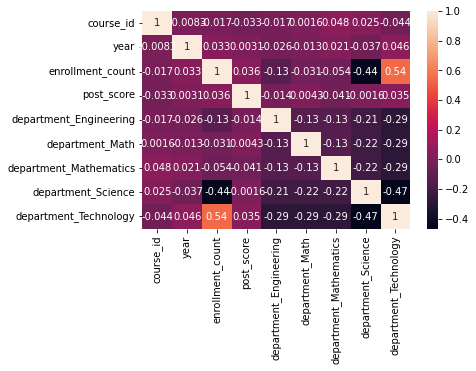

In [33]:
#heatmap
corr=df_enrollment1.corr(method="spearman")
sns.heatmap(corr,annot=True)

## DATA VISUALIZATION

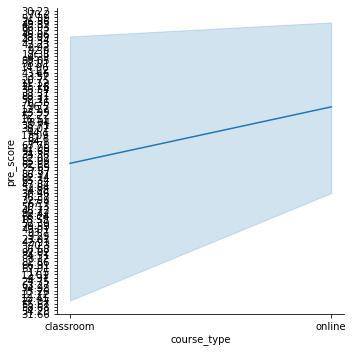

In [34]:
#checking the visualization of course_type and pre_test
sns.relplot(x="course_type" , y="pre_score",  data =df_enrollment,kind="line")

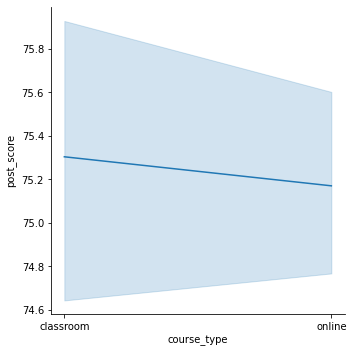

In [35]:
sns.relplot(x="course_type" , y="post_score",  data =df_enrollment,kind="line")

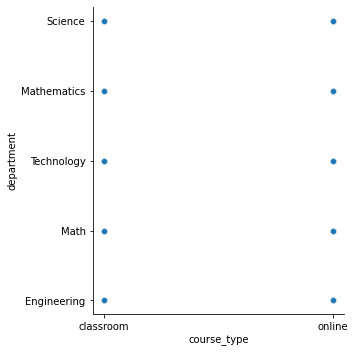

In [36]:
#which department has a higher enrollment
sns.relplot(x="course_type" , y="department",  data =df_enrollment,kind="scatter")

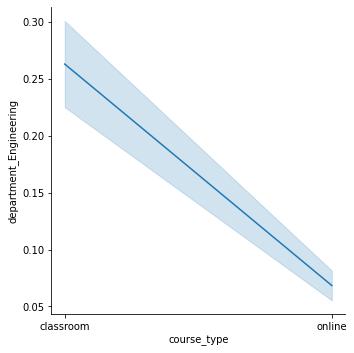

In [41]:
#course types in each department
sns.relplot(x="course_type" , y="department_Engineering",  data =df_enrollment1,kind="line")